# Check for GPU

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

from warnings import filterwarnings

import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import minmax_scale, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
import joblib
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import librosa, IPython
import librosa.display
from IPython.display import Audio
from IPython.display import clear_output

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow.keras.layers as Layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow_addons as tfa
import time

import os
import re

from random import seed
from random import randint
seed(1)

import glob
import imageio
import skimage

In [25]:
main_path = "C:/Users/hl/Desktop/Sound2/Data"

In [26]:
df = pd.read_csv(f'{main_path}/features_30_sec.csv')
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.76132,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.75550,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.19226,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.49480,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.20904,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.50860,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.23950,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.93880,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.71820,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.11260,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [27]:
labels = df["label"]
class_id = list()

for i in range(len(labels)):
    if labels[i] == 'blues':
        temp_class_id = 0
    elif labels[i] == 'classical':
        temp_class_id = 1
    elif labels[i] == 'country':
        temp_class_id = 2
    elif labels[i] == 'disco':
        temp_class_id = 3
    elif labels[i] == 'hiphop':
        temp_class_id = 4
    elif labels[i] == 'jazz':
        temp_class_id = 5
    elif labels[i] == 'metal':
        temp_class_id = 6
    elif labels[i] == 'pop':
        temp_class_id = 7
    elif labels[i] == 'reggae':
        temp_class_id = 8
    elif labels[i] == 'rock':
        temp_class_id = 9
    
    class_id.append(temp_class_id)
    
df["classID"] = class_id

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

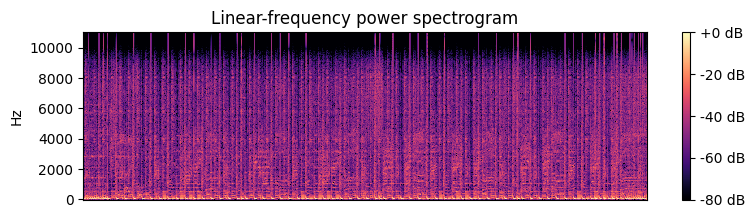

In [28]:
# Random wave file
dat1, sampling_rate1 = librosa.load(main_path+'/genres_original/disco/disco.00063.wav')
dat2, sampling_rate2 = librosa.load(main_path+'/genres_original/metal/metal.00048.wav')

plt.figure(figsize=(20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

## Using random samples to observe difference in waveforms

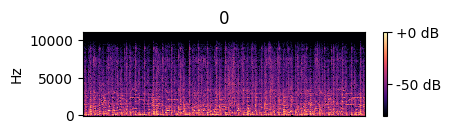

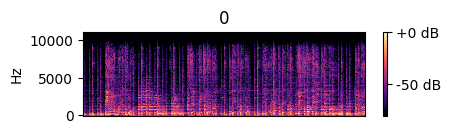

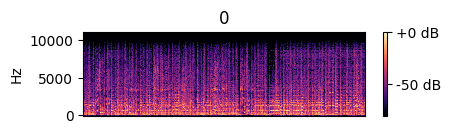

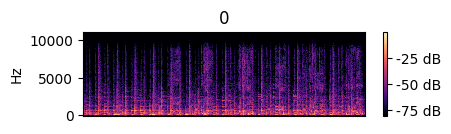

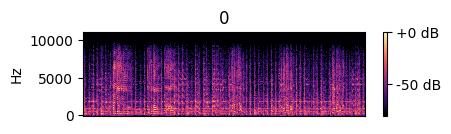

In [29]:
arr = np.array(df["filename"])

# for i in range(len(arr)):
#     arr[i] = 

genre = np.array(df["label"])
cla = np.array(df["classID"])

for i in range(5):
    path = main_path + '/genres_original/' + genre[i] + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10,5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

# Feature Extraction

In [30]:
dat1, sampling_rate1 = librosa.load('C:/Users/hl/Desktop/Sound2/Data/genres_original/jazz/jazz.00027.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 1293)

In [33]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(len(genre)):
        file_name = main_path + '/genres_original/' + genre[i] + '/' + df["filename"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [34]:
temp = parser(df)

In [35]:
temp = np.array(temp)
data = temp.transpose()

C:\Users\hl\AppData\Local\Temp\ipykernel_4228\1993562939.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)


In [45]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([len(df["filename"]), 128])

(999,) (999,)


In [46]:
for i in range(len(df["filename"])):
    X[i] = (X_[i])

In [47]:
Y = to_categorical(Y)

In [48]:
print(X.shape)
print(Y.shape)

(999, 128)
(999, 10)


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [58]:
X_test.shape

(250, 128)

In [59]:
X_train = X_train.reshape(749, 16, 8, 1)
X_test = X_test.reshape(250, 16, 8, 1)

In [60]:
input_dim = (16, 8, 1)

# Model

In [200]:
model = Sequential()

In [202]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [203]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [204]:
model.fit(X_train, Y_train, epochs = 75, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/75
15/15 [==============================] - 1s 17ms/step - loss: 2.3242 - accuracy: 0.1335 - val_loss: 2.1423 - val_accuracy: 0.2440
Epoch 2/75
15/15 [==============================] - 0s 9ms/step - loss: 1.9895 - accuracy: 0.2470 - val_loss: 1.8902 - val_accuracy: 0.2960
Epoch 3/75
15/15 [==============================] - 0s 8ms/step - loss: 1.6707 - accuracy: 0.3752 - val_loss: 1.7136 - val_accuracy: 0.4000
Epoch 4/75
15/15 [==============================] - 0s 8ms/step - loss: 1.5165 - accuracy: 0.4446 - val_loss: 1.6968 - val_accuracy: 0.4320
Epoch 5/75
15/15 [==============================] - 0s 8ms/step - loss: 1.3326 - accuracy: 0.5127 - val_loss: 1.5291 - val_accuracy: 0.4920
Epoch 6/75
15/15 [==============================] - 0s 8ms/step - loss: 1.2600 - accuracy: 0.5541 - val_loss: 1.5104 - val_accuracy: 0.5160
Epoch 7/75
15/15 [==============================] - 0s 8ms/step - loss: 1.1266 - accuracy: 0.6142 - val_loss: 1.5031 - val_accuracy: 0.5040
Epoch 8/75
15/15 [=

15/15 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 2.2317 - val_accuracy: 0.6080
Epoch 60/75
15/15 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.2542 - val_accuracy: 0.6080
Epoch 61/75
15/15 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.2439 - val_accuracy: 0.6120
Epoch 62/75
15/15 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.2605 - val_accuracy: 0.6080
Epoch 63/75
15/15 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.2428 - val_accuracy: 0.5920
Epoch 64/75
15/15 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.2158 - val_accuracy: 0.5920
Epoch 65/75
15/15 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.2274 - val_accuracy: 0.5920
Epoch 66/75
15/15 [======

In [205]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 8, 4, 64)          0         
                                                                 
 conv2d_65 (Conv2D)          (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 4, 2, 128)        0         
 g2D)                                                            
                                                                 
 dropout_57 (Dropout)        (None, 4, 2, 128)       

In [206]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

8/8 [==============================] - 0s 4ms/step - loss: 2.2895 - accuracy: 0.6000
[2.2895216941833496, 0.6000000238418579]


In [207]:
preds = np.argmax(predictions, axis = 1)

In [208]:
result = pd.DataFrame(preds)
result.to_csv("MusicClassificationResults.csv")